<a href="https://colab.research.google.com/github/carloseducorinto/Agents/blob/main/Agents_Data_Analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Multi-Agent System for Python Code Generation in Data Analytics

In this example, we will build a multi-agent system to generate Python code for data analytics. This system will streamline the creation of data analytics scripts, making the process more efficient and automated.

Importing Required Libraries:
```Python
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29 langchain_groq
```

In [94]:
#!pip install -q crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29
#!pip install -q langchain_groq
#!pip install opencv-python
#!pip install open-interpreter
#!pip install -q langchain_google_genai
#!pip install langchain_core --upgrade
#!pip install langchain-core==0.1.52


In [95]:
import warnings
from crewai import Agent, Crew, Task, Process
#from langchain_google_genai import ChatGoogleGenerativeAI
import os
from google.colab import userdata
#from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
from langchain_core.tools import Tool
from langchain.tools import tool
from langchain.agents import Tool
#import cv2
#from interpreter import interpreter
# Warning control
warnings.filterwarnings('ignore')

In [96]:


#interpreter.api_key = userdata.get('OPENAI_API_KEY')
#interpreter.auto_run = True
#interpreter.verbose = True
#interpreter.debug = True
#interpreter.llm.model_name = "openai/gpt-4-turbo-preview"
#interpreter.llm.temperature = 0.7


#class CLITool:
#  @tool("Executor")
#  def execute_cli_command(command:str):
#    """Execute CLI commands using Open Interpreter"""
#    result = interpreter.chat(command)
#    result = interpreter.computer.run("python", command)
#    return result




In [97]:
#!pip install langchain_experimental

In [98]:
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["SERPER_API_KEY"] = userdata.get('SERPER_API_KEY')
#os.environ["GEMINI_API_KEY"] = userdata.get('GEMINI_API_KEY')
#os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")
#llm=ChatGroq(temperature=0, model_name="llama3-70b-8192", api_key=userdata.get("GROQ_API_KEY"))
#llm = ChatGroq(temperature=0, model_name="mixtral-8x7b-32768",api_key=userdata.get("GROQ_API_KEY"))
llm=ChatOpenAI(model="gpt-4-turbo",temperature=0.7)
#llm = ChatGoogleGenerativeAI(model="gemini-pro")

## crewAI Tools

In [99]:
from crewai_tools import (
  FileReadTool,
  ScrapeWebsiteTool,
  SerperDevTool
)

search_tool = SerperDevTool()
scrape_tool = ScrapeWebsiteTool()
read_dataset = FileReadTool(file_path='./system_out.log')



In [100]:
#from IPython.display import Markdown, display
#display(Markdown("./guideline_best_practices_data_analytics.md"))

# Creating Agents

Agent 1: Sr. Business Analyst for Stock Market


In [101]:
# Agent 1: Stock Market Business Analyst
business_analyst_stock_market = Agent(
    role="Sr. Business Analyst",
    goal="Provide clear and comprehensive Business Requirement Definitions (BRD) based on the {user_story} "
         "for the tech team to implement a python code for evaluating the appliaction log in order to analyze the main errors "
         "and address their resolution in order to avoid repetition",
#   tools = [data_fetch_tool, analysis_tool, documentation_tool],
    tools = [read_dataset],
    verbose=True,
    backstory=(
        "As a Sr. Business Analyst specializing in IT production support issues evaluation, "
        "your expertise lies in translating the complex logs into business requirements definition "
        "Your deep understanding of IT production support metrics and analytical tools "
        "ensures that the solutions you help create are both effective and aligned "
        "with the {user_story}. Your role is pivotal in bridging the gap between "
        "production support needs and technical implementation, ensuring seamless and efficient development."
        "You must use the file log sytem_out.log as a primary data source. "    ),
#    llm = llm,
)


In [102]:
# Agent 2: Senior Python Programmer
senior_python_programmer = Agent(
    role="Senior Python Programmer",
    goal="Implement the Python code to be executed in Jupyter Notebook based on the Business Requirement Definitions (BRD)"
         "Do not use functions neither class because this code will be executed in Jupyter Notebook" ,
#    tools = [CLITool.execute_cli_command],
#    tools = [python_repl_tool, read_guideline, semantic_search_guideline],
#    tools = [read_guideline],
    verbose=True,
    backstory=(
        "As a Senior Python Programmer with extensive experience in data analytics, "
        "you excel at transforming detailed business requirements into robust, efficient, and scalable code. "
    ),
#    llm = llm
)


In [103]:
# Agent 3: Senior Quality Assurance Analyst
senior_qa_analyst = Agent(
    role="Senior Quality Assurance Analyst",
    goal="Ensure the accuracy, performance, and reliability of Python code  "
         "implemented by the Senior Python Programmer, based on the Business Requirement Definitions (BRD).",
#   tools = [testing_tool, validation_tool, reporting_tool],
#   tools = [python_repl_tool, read_guideline, semantic_search_guideline],
#   tools = [read_guideline],
#   tools = [CLITool.execute_cli_command],
    verbose=True,
    backstory=(
        "As a Senior Quality Assurance Analyst with a specialization in data analytics tools, "
        "you bring a wealth of experience in validating and verifying python code quality. "
        "Your meticulous approach to testing ensures that all aspects of the implemented solutions are thoroughly evaluated. "
        "You collaborate closely with developers and analysts to identify potential issues, ensuring that the final product "
        "meets the highest standards of quality and performance. Your role is critical in maintaining the integrity and reliability "
        "of the python code."    ),
#    llm = llm
)


## Creating Tasks

In [104]:
# Task for Sr. Business Analyst: Define Business Requirements
business_analyst_stock_market_task = Task(
    description=(
        "Given the {user_story} and the {file_name} analyze the production issues data "
        "and document detailed Business Requirement Definitions (BRD) for the development team to implement the Python code "
        "for extracting useful insights from the log and perform the log data analysis."
        "You must provide the follow visualiations: "
        "1-  Visualization: Bar Chart for Error Types "
        "to be implemented in python."    ),
    expected_output=(
        "A comprehensive Business Requirement Definition (BRD) document that includes detailed descriptions "
        "of the log evaluation, processing steps, "
        "visualization needs, and reporting requirements according to the {user_story}."
            ),
    agent=business_analyst_stock_market,
    output_file="business_requirement_data_analysis.md",

#    async_execution=True,
#    llm = llm
)



In [105]:
# Task for Senior Python Programmer: Implement Business Requirements
senior_python_programmer_task = Task(
    description=(
        "Based on the Business Requirement Definitions (BRD) and the {file_name} provided by the Sr. Business Analyst and also the {user_story}, "
        "implement the necessary Python code."
        "Ensure the code is efficient, scalable, and aligns with the documented requirements. "
        "Collaborate with the Business Analyst and QA team to validate and refine the implementation. "
          ),
    expected_output=(
        "A python code to run in Jupyter noteebook, considering the package installation and the libraries import to be executed for data analysis proposal"
        "as specified in the BRD. The code should be ready for testing and deployment."
    ),
    agent=senior_python_programmer,
#    async_execution=True,
#    llm = llm,
    output_file="data_analysis_code.ipynb",
    context=[business_analyst_stock_market_task]
)


In [106]:
# Task for Senior Quality Assurance Analyst: Validate Implementation
senior_qa_analyst_task = Task(
    description=(
        "Conduct thorough testing and validation the python code "
        "implemented by the Senior Python Programmer. Ensure that all functionalities align with the Business Requirement Definitions (BRD) "
        "and the {user_story} provided by the Sr. Business Analyst. "
        "Identify and document any issues, and work with the development team to resolve them. "
        "Perform performance testing and ensure the accuracy and reliability of the data analysis."
          ),
    expected_output=(
         "A comprehensive test report documenting the results of all tests conducted, "
         "including identified issues, resolutions, and final validation of the python code. "
         "The python code should be confirmed as accurate, reliable, and ready for deployment."
    ),
    agent=senior_qa_analyst,
    context=[business_analyst_stock_market_task,senior_python_programmer_task],
    output_file="data_analysis_qa_document.ipynb",
    allow_delegation=True,
  #   async_execution=True,
 #   llm = llm
)


- You can pass a list of tasks as `context` to a task.
- The task then takes into account the output of those tasks in its execution.
- The task will not run until it has the output(s) from those tasks.

## Creating the Crew

In [107]:
data_analysis_stock_market = Crew(
    agents=[business_analyst_stock_market,
            senior_python_programmer,
            senior_qa_analyst],

    tasks=[business_analyst_stock_market_task,
           senior_python_programmer_task,
           senior_qa_analyst_task],
    manager_llm=llm,
    process=Process.hierarchical,
    verbose=True
)

## Running the Crew

- Set the inputs for the execution of the crew.

In [108]:
stock_market_data_analysis_inputs = {
    'user_story': "As a Tech Team Manager, I want to evaluate the system log issues in a visual manner "
                  "so that I can identify trends, improvements, pain points, and make informed decisions "
                  "to improve the production environment health. I need to see the evaluation results in a visual manner.",
    'file_name': "system_out.log"
}


In [109]:
### this execution will take a few minutes to run
result = data_analysis_stock_market.kickoff(inputs=stock_market_data_analysis_inputs)
print('**************************************FINAL**************************************************')

 [DEBUG]: Working Agent: Crew Manager
 [INFO]: Starting Task: Given the As a Tech Team Manager, I want to evaluate the system log issues in a visual manner so that I can identify trends, improvements, pain points, and make informed decisions to improve the production environment health. I need to see the evaluation results in a visual manner. and the system_out.log analyze the production issues data and document detailed Business Requirement Definitions (BRD) for the development team to implement the Python code for extracting useful insights from the log and perform the log data analysis.You must provide the follow visualiations: 1-  Visualization: Bar Chart for Error Types to be implemented in python.


> Entering new CrewAgentExecutor chain...
Thought: To begin crafting the BRD, I need to understand the specifics of the system log issues that need to be evaluated, the types of errors that occur, and how they can be classified and visualized. It's essential to gather preliminary insi

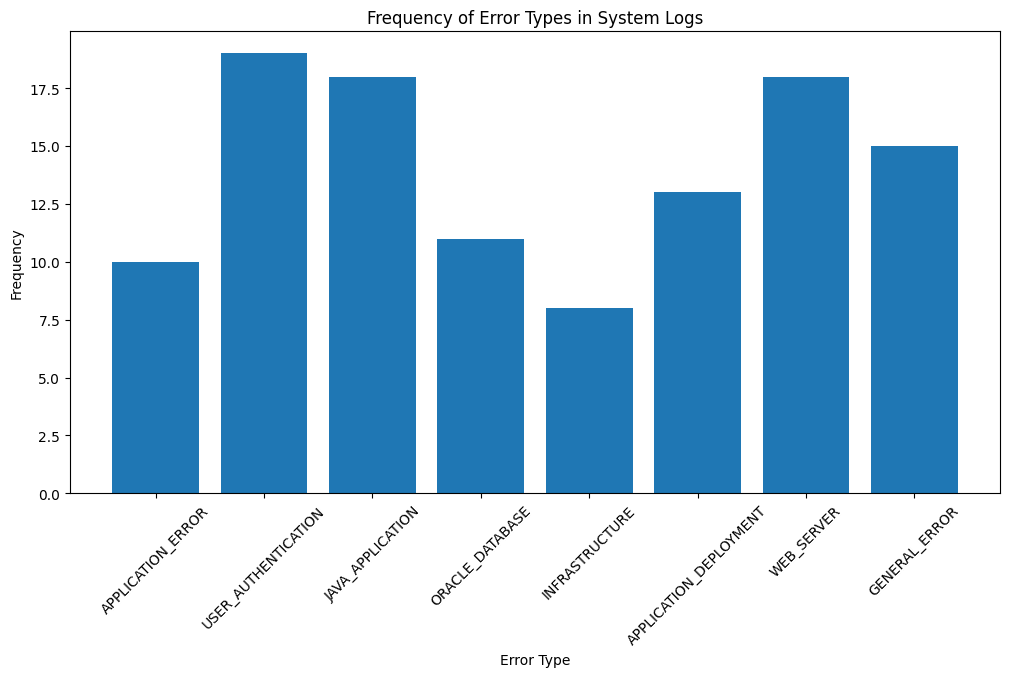

In [110]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

# Reading the log file
with open('system_out.log', 'r') as file:
    logs = file.read()

# Defining error types
error_types = ['APPLICATION_ERROR', 'USER_AUTHENTICATION', 'JAVA_APPLICATION', 'ORACLE_DATABASE', 'INFRASTRUCTURE', 'APPLICATION_DEPLOYMENT', 'WEB_SERVER', 'GENERAL_ERROR']

# Extracting error types from logs
errors = {error: len(re.findall(error, logs)) for error in error_types}

# Transforming errors into DataFrame
df = pd.DataFrame(errors.items(), columns=['Error_Type', 'Frequency'])

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['Error_Type'], df['Frequency'])
plt.xlabel('Error Type')
plt.ylabel('Frequency')
plt.title('Frequency of Error Types in System Logs')
plt.xticks(rotation=45)
plt.show()
